### What this notebook will do
This notebook will deal with the generation of measurements on the annotation audio. Each annotation audio file will be split into smaller segments of 50ms length. 50ms is chosen as it is the same temporal scale as the longest calls. The idea is that if possible, one segment should contain at least one call. 

The 'valid_annotations' have been chosen in the 'choosing valid annotations...' Jupyter notebook. 'valid annotations' are those with only the target species, where there was detectable audio when a bat was flying, and those that have been double checked to be correctly annotated. See the notebook for more details. 

In this notebook, the audio corresponding to all the 'valid_annotations' will be  split-measured to generate the raw data for all further statistical analysis that will follow to compare single vs. multi bat call sequences. 


- Author: Thejasvi Beleyur
- Date of initiation: 2020-07-11

In [1]:
import datetime as dt
import sys 
sys.path.append('/home/tbeleyur/Documents/packages_dev/correct_call_annotations/')
sys.path.append('../')
sys.path.append('../../individual_call_analysis/analysis/')

import correct_call_annotations.correct_call_annotations as cca
import format_and_clean
from format_and_clean import ind_call_format as icf
import measure_annot_audio

from measure_annot_audio import split_measure
from measure_annot_audio.inbuilt_measurement_functions import dB
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
import tqdm

In [2]:
%matplotlib notebook

In [3]:
print(f'Notebook started at: {dt.datetime.now()}')

Notebook started at: 2020-07-13 16:59:12.532819


In [4]:
verif_annots = pd.read_csv('../verified_annotations.csv').reset_index(drop=True) # manually re-checked set of audio files.
# See ../choosing valid annotation audio files.ipynb

verif_annots

Unnamed: 0                                  valid_annotations
0             0   matching_annotaudio_Aditya_2018-08-16_21502300_9
1             1  matching_annotaudio_Aditya_2018-08-16_21502300_12
2             2  matching_annotaudio_Aditya_2018-08-16_21502300_18
3             3  matching_annotaudio_Aditya_2018-08-16_21502300_19
4             4  matching_annotaudio_Aditya_2018-08-16_21502300_20
..          ...                                                ...
612         624  matching_annotaudio_Aditya_2018-08-20_0300-040...
613         625  matching_annotaudio_Aditya_2018-08-20_0300-040...
614         626  matching_annotaudio_Aditya_2018-08-20_0300-040...
615         627  matching_annotaudio_Aditya_2018-08-20_0300-040...
616         628  matching_annotaudio_Aditya_2018-08-20_0300-040...

[617 rows x 2 columns]

In [5]:
all_measures = []

In [6]:
for i, row in tqdm.tqdm(verif_annots.iterrows()):
    
    audio_folder = '../../individual_call_analysis/hp_annotation_audio/'
    file_path = cca.find_file_in_folder(verif_annots['valid_annotations'][i]+'_hp.WAV', audio_folder)
    measurements = split_measure.split_measure_audio(file_path[0],
                                  spectrum_smoothing_width=100,
                                  inter_peak_difference=1000,
                                  peak_range=20)
    all_measures.append(measurements)



1it [00:00,  9.26it/s]

Match found!
Match found!


2it [00:00,  6.89it/s]

Match found!


3it [00:00,  5.09it/s]

Match found!


4it [00:01,  3.49it/s]

Match found!


5it [00:01,  2.21it/s]

Match found!


6it [00:02,  1.85it/s]

Match found!


7it [00:02,  2.26it/s]

Match found!


8it [00:03,  2.49it/s]

Match found!


9it [00:03,  2.84it/s]

Match found!


11it [00:04,  2.59it/s]

Match found!
Match found!


12it [00:05,  1.95it/s]

Match found!


13it [00:05,  1.81it/s]

Match found!


14it [00:06,  1.86it/s]

Match found!


15it [00:07,  1.19it/s]

Match found!


16it [00:08,  1.23it/s]

Match found!


18it [00:09,  1.55it/s]

Match found!
Match found!


19it [00:10,  1.81it/s]

Match found!


20it [00:10,  2.04it/s]

Match found!


21it [00:11,  1.95it/s]

Match found!


22it [00:11,  2.12it/s]

Match found!


23it [00:13,  1.07s/it]

Match found!


24it [00:14,  1.22it/s]

Match found!


25it [00:15,  1.13it/s]

Match found!


26it [00:15,  1.35it/s]

Match found!


28it [00:16,  1.70it/s]

Match found!
Match found!


29it [00:17,  1.84it/s]

Match found!


30it [00:17,  1.86it/s]

Match found!


31it [00:18,  1.91it/s]

Match found!


33it [00:19,  1.56it/s]

Match found!
Match found!


34it [00:20,  1.57it/s]

Match found!


35it [00:20,  1.94it/s]

Match found!


36it [00:20,  2.32it/s]

Match found!


37it [00:21,  2.60it/s]

Match found!
Match found!


39it [00:21,  3.13it/s]

Match found!
Match found!


42it [00:21,  4.29it/s]

Match found!
Match found!


44it [00:22,  5.24it/s]

Match found!
Match found!


45it [00:22,  3.23it/s]

Match found!


47it [00:23,  3.69it/s]

Match found!
Match found!


48it [00:23,  3.79it/s]

Match found!
Match found!


51it [00:23,  4.97it/s]

Match found!
Match found!


53it [00:24,  5.79it/s]

Match found!
Match found!


54it [00:24,  4.68it/s]

Match found!


55it [00:24,  4.59it/s]

Match found!


56it [00:25,  1.88it/s]

Match found!


58it [00:26,  2.30it/s]

Match found!
Match found!


59it [00:27,  2.56it/s]

Match found!


60it [00:27,  2.91it/s]

Match found!
Match found!


62it [00:27,  3.27it/s]

Match found!


63it [00:27,  3.49it/s]

Match found!


64it [00:28,  2.65it/s]

Match found!


65it [00:29,  2.20it/s]

Match found!


66it [00:29,  1.94it/s]

Match found!


67it [00:30,  2.33it/s]

Match found!


68it [00:30,  2.73it/s]

Match found!


70it [00:31,  2.09it/s]

Match found!
Match found!


71it [00:33,  1.12it/s]

Match found!


73it [00:33,  1.86it/s]

Match found!
Match found!


74it [00:34,  2.23it/s]

Match found!


75it [00:34,  1.79it/s]

Match found!


77it [00:36,  1.93it/s]

Match found!
Match found!


78it [00:36,  2.17it/s]

Match found!


79it [00:36,  2.01it/s]

Match found!


81it [00:37,  2.30it/s]

Match found!


82it [00:37,  2.99it/s]

Match found!
Match found!


83it [00:38,  2.83it/s]

Match found!


85it [00:38,  3.58it/s]

Match found!
Match found!


87it [00:39,  2.95it/s]

Match found!
Match found!


88it [00:40,  2.68it/s]

Match found!


89it [00:40,  2.97it/s]

Match found!
Match found!


92it [00:40,  4.29it/s]

Match found!
Match found!


93it [00:40,  4.87it/s]

Match found!


96it [00:41,  4.57it/s]

Match found!
Match found!
Match found!


98it [00:41,  5.06it/s]

Match found!
Match found!


99it [00:41,  5.03it/s]

Match found!


101it [00:42,  4.66it/s]

Match found!
Match found!


102it [00:42,  5.06it/s]

Match found!
Match found!


104it [00:42,  5.80it/s]

Match found!


105it [00:43,  5.20it/s]

Match found!


106it [00:43,  4.90it/s]

Match found!


107it [00:44,  2.22it/s]

Match found!
Match found!


110it [00:45,  3.07it/s]

Match found!
Match found!
Match found!


112it [00:46,  2.66it/s]

Match found!


113it [00:47,  1.54it/s]

Match found!


116it [00:47,  2.49it/s]

Match found!
Match found!
Match found!


117it [00:48,  2.66it/s]

Match found!


118it [00:48,  2.82it/s]

Match found!


121it [00:48,  3.62it/s]

Match found!
Match found!
Match found!


122it [00:49,  3.87it/s]

Match found!


123it [00:49,  4.05it/s]

Match found!


124it [00:49,  3.90it/s]

Match found!


125it [00:50,  3.41it/s]

Match found!


126it [00:50,  3.74it/s]

Match found!


127it [00:50,  3.54it/s]

Match found!


130it [00:51,  4.58it/s]

Match found!
Match found!
Match found!


132it [00:51,  4.04it/s]

Match found!
Match found!


134it [00:51,  5.18it/s]

Match found!
Match found!


137it [00:52,  5.14it/s]

Match found!
Match found!
Match found!


138it [00:52,  5.25it/s]

Match found!


140it [00:52,  5.74it/s]

Match found!
Match found!


141it [00:53,  2.95it/s]

Match found!


143it [00:54,  3.21it/s]

Match found!
Match found!


146it [00:56,  1.47it/s]

Match found!
Match found!
Match found!


148it [00:57,  2.16it/s]

Match found!
Match found!


150it [00:57,  2.76it/s]

Match found!
Match found!


151it [00:57,  3.04it/s]

Match found!


153it [00:58,  3.97it/s]

Match found!
Match found!


155it [00:58,  4.51it/s]

Match found!


156it [00:58,  5.25it/s]

Match found!
Match found!


157it [00:59,  4.71it/s]

Match found!


159it [00:59,  3.84it/s]

Match found!
Match found!


160it [00:59,  4.45it/s]

Match found!


164it [01:00,  6.69it/s]

Match found!
Match found!
Match found!
Match found!
Match found!


168it [01:00,  7.64it/s]

Match found!
Match found!
Match found!


170it [01:01,  5.68it/s]

Match found!
Match found!


172it [01:01,  6.46it/s]

Match found!
Match found!


173it [01:01,  6.09it/s]

Match found!


174it [01:02,  4.60it/s]

Match found!


176it [01:02,  4.42it/s]

Match found!
Match found!


178it [01:03,  4.47it/s]

Match found!
Match found!


179it [01:03,  5.17it/s]

Match found!


181it [01:03,  4.09it/s]

Match found!
Match found!
Match found!


183it [01:04,  5.04it/s]

Match found!


184it [01:04,  4.24it/s]

Match found!
Match found!


186it [01:04,  4.90it/s]

Match found!


188it [01:05,  3.63it/s]

Match found!
Match found!


189it [01:05,  4.34it/s]

Match found!


190it [01:06,  2.47it/s]

Match found!


192it [01:07,  2.71it/s]

Match found!
Match found!


194it [01:07,  3.80it/s]

Match found!
Match found!


195it [01:07,  3.48it/s]

Match found!


196it [01:08,  2.99it/s]

Match found!


198it [01:09,  2.04it/s]

Match found!
Match found!


200it [01:10,  1.88it/s]

Match found!
Match found!


201it [01:11,  1.91it/s]

Match found!


202it [01:11,  2.17it/s]

Match found!


204it [01:12,  3.24it/s]

Match found!
Match found!


205it [01:12,  2.59it/s]

Match found!
Match found!


207it [01:12,  3.30it/s]

Match found!


208it [01:13,  3.36it/s]

Match found!


209it [01:15,  1.02s/it]

Match found!
Match found!


211it [01:17,  1.14it/s]

Match found!


212it [01:17,  1.39it/s]

Match found!


213it [01:17,  1.62it/s]

Match found!
Match found!


215it [01:18,  2.10it/s]

Match found!
Match found!


217it [01:18,  2.52it/s]

Match found!


219it [01:19,  2.88it/s]

Match found!
Match found!


221it [01:19,  3.55it/s]

Match found!
Match found!


223it [01:19,  4.50it/s]

Match found!
Match found!


225it [01:21,  1.77it/s]

Match found!
Match found!


226it [01:21,  2.33it/s]

Match found!
Match found!


228it [01:22,  2.17it/s]

Match found!


229it [01:23,  2.01it/s]

Match found!


230it [01:24,  1.54it/s]

Match found!


231it [01:26,  1.03s/it]

Match found!


232it [01:27,  1.02s/it]

Match found!


233it [01:28,  1.06it/s]

Match found!


234it [01:29,  1.00s/it]

Match found!


235it [01:30,  1.05s/it]

Match found!
Match found!


237it [01:31,  1.23it/s]

Match found!


238it [01:31,  1.54it/s]

Match found!
Match found!


240it [01:31,  2.00it/s]

Match found!


241it [01:31,  2.22it/s]

Match found!
Match found!


243it [01:32,  2.45it/s]

Match found!


245it [01:33,  3.26it/s]

Match found!
Match found!


246it [01:33,  3.51it/s]

Match found!


247it [01:33,  2.43it/s]

Match found!
Match found!
Match found!


250it [01:34,  2.98it/s]

Match found!


251it [01:34,  2.53it/s]

Match found!


252it [01:35,  2.67it/s]

Match found!


255it [01:35,  3.74it/s]

Match found!
Match found!
Match found!


256it [01:36,  3.71it/s]

Match found!


259it [01:36,  4.32it/s]

Match found!
Match found!
Match found!


261it [01:36,  5.07it/s]

Match found!
Match found!


262it [01:36,  5.64it/s]

Match found!


263it [01:38,  1.98it/s]

Match found!
Match found!


265it [01:38,  2.49it/s]

Match found!


266it [01:38,  2.63it/s]

Match found!


267it [01:39,  2.66it/s]

Match found!


268it [01:39,  2.16it/s]

Match found!


269it [01:40,  2.38it/s]

Match found!
Match found!


272it [01:40,  3.48it/s]

Match found!
Match found!


273it [01:40,  3.38it/s]

Match found!


275it [01:41,  3.92it/s]

Match found!
Match found!


277it [01:41,  5.15it/s]

Match found!
Match found!


278it [01:42,  3.72it/s]

Match found!


279it [01:42,  2.83it/s]

Match found!


281it [01:43,  3.71it/s]

Match found!
Match found!


283it [01:43,  4.04it/s]

Match found!
Match found!


285it [01:43,  4.33it/s]

Match found!
Match found!


286it [01:44,  4.74it/s]

Match found!


287it [01:44,  3.79it/s]

Match found!
Match found!


289it [01:45,  3.60it/s]

Match found!


290it [01:45,  3.27it/s]

Match found!


293it [01:45,  4.23it/s]

Match found!
Match found!
Match found!


295it [01:46,  3.31it/s]

Match found!
Match found!


297it [01:47,  3.96it/s]

Match found!
Match found!


298it [01:47,  3.93it/s]

Match found!


299it [01:48,  2.89it/s]

Match found!


302it [01:48,  3.41it/s]

Match found!
Match found!
Match found!


304it [01:48,  4.42it/s]

Match found!
Match found!


305it [01:49,  4.69it/s]

Match found!


306it [01:50,  2.50it/s]

Match found!


307it [01:50,  1.90it/s]

Match found!


308it [01:51,  1.62it/s]

Match found!


309it [01:52,  1.81it/s]

Match found!


310it [01:52,  1.88it/s]

Match found!


312it [01:53,  2.28it/s]

Match found!
Match found!


313it [01:53,  2.49it/s]

Match found!


314it [01:54,  2.08it/s]

Match found!


315it [01:54,  2.41it/s]

Match found!


317it [01:55,  2.66it/s]

Match found!
Match found!


319it [01:55,  3.41it/s]

Match found!
Match found!


320it [01:55,  3.27it/s]

Match found!


321it [01:56,  2.75it/s]

Match found!


322it [01:57,  2.09it/s]

Match found!


323it [01:57,  2.25it/s]

Match found!


324it [01:57,  2.46it/s]

Match found!
Match found!


327it [01:58,  3.69it/s]

Match found!
Match found!
Match found!


329it [01:58,  4.45it/s]

Match found!
Match found!


333it [01:59,  3.65it/s]

Match found!
Match found!
Match found!


334it [02:00,  2.14it/s]

Match found!


335it [02:01,  2.54it/s]

Match found!
Match found!


338it [02:01,  3.60it/s]

Match found!
Match found!


340it [02:02,  3.82it/s]

Match found!
Match found!


341it [02:02,  3.30it/s]

Match found!


342it [02:02,  3.25it/s]

Match found!


343it [02:03,  1.88it/s]

Match found!


345it [02:04,  2.60it/s]

Match found!
Match found!


346it [02:04,  3.15it/s]

Match found!


347it [02:05,  2.18it/s]

Match found!
Match found!


349it [02:05,  2.79it/s]

Match found!


350it [02:06,  2.21it/s]

Match found!
Match found!


354it [02:06,  3.55it/s]

Match found!
Match found!
Match found!


355it [02:07,  2.58it/s]

Match found!
Match found!


357it [02:07,  3.22it/s]

Match found!


358it [02:07,  3.49it/s]

Match found!


359it [02:08,  2.67it/s]

Match found!


360it [02:09,  1.79it/s]

Match found!


362it [02:10,  2.02it/s]

Match found!
Match found!


364it [02:10,  3.38it/s]

Match found!
Match found!
Match found!


367it [02:11,  3.76it/s]

Match found!
Match found!


368it [02:11,  4.35it/s]

Match found!


369it [02:12,  1.87it/s]

Match found!


371it [02:13,  2.73it/s]

Match found!
Match found!


373it [02:14,  3.08it/s]

Match found!
Match found!


375it [02:14,  2.89it/s]

Match found!
Match found!


377it [02:15,  3.56it/s]

Match found!
Match found!


380it [02:15,  5.03it/s]

Match found!
Match found!
Match found!


381it [02:15,  4.54it/s]

Match found!
Match found!


384it [02:16,  5.71it/s]

Match found!
Match found!


386it [02:17,  3.55it/s]

Match found!
Match found!


387it [02:17,  4.13it/s]

Match found!


388it [02:17,  4.31it/s]

Match found!


389it [02:18,  1.97it/s]

Match found!


390it [02:19,  1.37it/s]

Match found!


391it [02:24,  1.98s/it]

Match found!


392it [02:25,  1.61s/it]

Match found!


393it [02:26,  1.29s/it]

Match found!


395it [02:26,  1.32it/s]

Match found!
Match found!


396it [02:26,  1.73it/s]

Match found!
Match found!


398it [02:27,  2.28it/s]

Match found!


399it [02:27,  1.98it/s]

Match found!


401it [02:28,  2.34it/s]

Match found!
Match found!


402it [02:28,  2.60it/s]

Match found!


403it [02:29,  2.57it/s]

Match found!


404it [02:29,  2.65it/s]

Match found!


407it [02:29,  3.98it/s]

Match found!
Match found!
Match found!
Match found!


409it [02:30,  4.24it/s]

Match found!


410it [02:30,  4.37it/s]

Match found!
Match found!


413it [02:31,  3.73it/s]

Match found!
Match found!


414it [02:34,  1.03it/s]

Match found!


416it [02:36,  1.17it/s]

Match found!
Match found!


418it [02:36,  1.62it/s]

Match found!
Match found!


419it [02:36,  2.00it/s]

Match found!


422it [02:36,  3.19it/s]

Match found!
Match found!
Match found!


424it [02:37,  2.77it/s]

Match found!
Match found!


425it [02:38,  1.88it/s]

Match found!


426it [02:40,  1.27it/s]

Match found!


427it [02:40,  1.49it/s]

Match found!


428it [02:40,  1.71it/s]

Match found!


429it [02:42,  1.16it/s]

Match found!
Match found!


432it [02:43,  1.92it/s]

Match found!
Match found!


433it [02:43,  1.87it/s]

Match found!


435it [02:46,  1.08it/s]

Match found!
Match found!
Match found!


438it [02:47,  1.83it/s]

Match found!
Match found!


439it [02:47,  2.21it/s]

Match found!


440it [02:48,  2.15it/s]

Match found!


442it [02:48,  2.99it/s]

Match found!
Match found!


444it [02:48,  3.90it/s]

Match found!
Match found!


447it [02:49,  5.26it/s]

Match found!
Match found!
Match found!


448it [02:49,  6.03it/s]

Match found!
Match found!


450it [02:49,  5.32it/s]

Match found!
Match found!


452it [02:50,  4.52it/s]

Match found!
Match found!


454it [02:50,  5.12it/s]

Match found!
Match found!


456it [02:51,  4.43it/s]

Match found!


457it [02:51,  3.52it/s]

Match found!


459it [02:52,  3.57it/s]

Match found!
Match found!


461it [02:53,  3.14it/s]

Match found!
Match found!


462it [02:54,  1.49it/s]

Match found!


463it [02:55,  1.31it/s]

Match found!


464it [02:55,  1.59it/s]

Match found!


465it [02:56,  1.78it/s]

Match found!


466it [02:56,  2.15it/s]

Match found!


469it [02:57,  3.07it/s]

Match found!
Match found!
Match found!
Match found!


471it [02:57,  3.26it/s]

Match found!
Match found!


475it [02:57,  5.09it/s]

Match found!
Match found!
Match found!


476it [02:58,  3.86it/s]

Match found!
Match found!


478it [02:58,  4.38it/s]

Match found!


479it [02:58,  4.35it/s]

Match found!
Match found!


481it [02:59,  3.98it/s]

Match found!


482it [02:59,  3.76it/s]

Match found!


483it [03:00,  3.67it/s]

Match found!


484it [03:00,  2.93it/s]

Match found!


486it [03:01,  3.48it/s]

Match found!
Match found!


487it [03:01,  4.02it/s]

Match found!
Match found!


490it [03:02,  3.93it/s]

Match found!
Match found!


492it [03:02,  5.34it/s]

Match found!
Match found!


493it [03:02,  3.60it/s]

Match found!


494it [03:03,  3.79it/s]

Match found!


495it [03:04,  1.74it/s]

Match found!


496it [03:04,  2.06it/s]

Match found!


497it [03:05,  1.59it/s]

Match found!
Match found!


499it [03:07,  1.46it/s]

Match found!


501it [03:08,  1.73it/s]

Match found!
Match found!


502it [03:09,  1.28it/s]

Match found!


503it [03:10,  1.42it/s]

Match found!


505it [03:11,  1.81it/s]

Match found!
Match found!


506it [03:11,  2.33it/s]

Match found!


507it [03:11,  2.13it/s]

Match found!
Match found!


509it [03:12,  2.76it/s]

Match found!


511it [03:12,  3.49it/s]

Match found!


512it [03:12,  4.32it/s]

Match found!
Match found!
Match found!


514it [03:12,  5.43it/s]

Match found!


515it [03:13,  4.06it/s]

Match found!


516it [03:13,  2.43it/s]

Match found!


517it [03:14,  2.35it/s]

Match found!


519it [03:14,  3.03it/s]

Match found!
Match found!


520it [03:15,  3.35it/s]

Match found!


521it [03:15,  3.12it/s]

Match found!


524it [03:16,  2.93it/s]

Match found!
Match found!
Match found!


525it [03:17,  2.23it/s]

Match found!


526it [03:17,  2.05it/s]

Match found!


529it [03:18,  2.47it/s]

Match found!
Match found!
Match found!
Match found!
Match found!


532it [03:18,  3.15it/s]

Match found!


533it [03:19,  3.24it/s]

Match found!


534it [03:19,  3.14it/s]

Match found!


535it [03:19,  2.84it/s]

Match found!


536it [03:20,  3.10it/s]

Match found!


537it [03:20,  2.99it/s]

Match found!


539it [03:21,  3.05it/s]

Match found!
Match found!


540it [03:21,  2.95it/s]

Match found!


541it [03:21,  3.15it/s]

Match found!


542it [03:22,  3.48it/s]

Match found!


544it [03:22,  4.10it/s]

Match found!
Match found!


545it [03:23,  2.32it/s]

Match found!


546it [03:23,  2.69it/s]

Match found!


548it [03:24,  3.80it/s]

Match found!
Match found!


549it [03:24,  4.52it/s]

Match found!


550it [03:24,  3.95it/s]

Match found!


553it [03:24,  4.90it/s]

Match found!
Match found!
Match found!


555it [03:25,  6.19it/s]

Match found!
Match found!


557it [03:25,  5.27it/s]

Match found!
Match found!


559it [03:25,  6.72it/s]

Match found!
Match found!


560it [03:25,  5.77it/s]

Match found!


561it [03:26,  4.88it/s]

Match found!


562it [03:26,  4.43it/s]

Match found!


563it [03:26,  3.93it/s]

Match found!


564it [03:27,  3.91it/s]

Match found!


565it [03:27,  3.83it/s]

Match found!


566it [03:27,  3.39it/s]

Match found!


567it [03:29,  1.65it/s]

Match found!


569it [03:29,  2.54it/s]

Match found!
Match found!


571it [03:29,  3.62it/s]

Match found!
Match found!


573it [03:30,  5.07it/s]

Match found!
Match found!


575it [03:30,  4.85it/s]

Match found!
Match found!


577it [03:30,  5.19it/s]

Match found!
Match found!


579it [03:31,  5.21it/s]

Match found!
Match found!


580it [03:31,  4.83it/s]

Match found!


581it [03:31,  3.71it/s]

Match found!
Match found!


583it [03:32,  3.70it/s]

Match found!


585it [03:33,  3.38it/s]

Match found!
Match found!


586it [03:33,  3.98it/s]

Match found!


587it [03:33,  3.47it/s]

Match found!


588it [03:34,  2.50it/s]

Match found!
Match found!


591it [03:34,  3.49it/s]

Match found!
Match found!


592it [03:35,  3.10it/s]

Match found!


593it [03:35,  2.65it/s]

Match found!


595it [03:36,  3.68it/s]

Match found!
Match found!


597it [03:36,  4.12it/s]

Match found!
Match found!


598it [03:36,  4.27it/s]

Match found!


599it [03:38,  1.61it/s]

Match found!


600it [03:38,  1.80it/s]

Match found!


602it [03:39,  2.38it/s]

Match found!
Match found!


604it [03:39,  3.39it/s]

Match found!
Match found!


606it [03:39,  4.38it/s]

Match found!
Match found!


608it [03:41,  2.67it/s]

Match found!
Match found!


610it [03:42,  1.92it/s]

Match found!
Match found!


611it [03:42,  2.30it/s]

Match found!
Match found!
Match found!


615it [03:43,  3.59it/s]

Match found!
Match found!


617it [03:43,  2.76it/s]

Match found!


In [7]:
all_split_measure = pd.concat(all_measures).reset_index(drop=True)

In [8]:
all_split_measure

value  segment_number           measurement  \
0            0.032661               0                   rms   
1            0.102295               0        peak_amplitude   
2       104420.000000               0   minus_XdB_frequency   
3       104700.000000               0  dominant_frequencies   
4            0.012252               1                   rms   
...               ...             ...                   ...   
331729   92600.000000              12  dominant_frequencies   
331730  100680.000000              12  dominant_frequencies   
331731  103600.000000              12  dominant_frequencies   
331732  105100.000000              12  dominant_frequencies   
331733  106780.000000              12  dominant_frequencies   

                                                file_name  
0       matching_annotaudio_Aditya_2018-08-16_21502300...  
1       matching_annotaudio_Aditya_2018-08-16_21502300...  
2       matching_annotaudio_Aditya_2018-08-16_21502300...  
3       matching_annotaudio_Aditya_2018-08-16_21502300...  
4       matching_annotaudio_Aditya_2018-08-16_21502300...  
...                                                   ...  
331729  matching_annotaudio_Aditya_2018-08-20_0300-040...  
331730  matching_annotaudio_Aditya_2018-08-20_0300-040...  
331731  matching_annotaudio_Aditya_2018-08-20_0300-040...  
331732  matching_annotaudio_Aditya_2018-08-20_0300-040...  
331733  matching_annotaudio_Aditya_2018-08-20_0300-040...  

[331734 rows x 4 columns]

In [9]:
all_split_measure['unique_window_id'] = all_split_measure['segment_number'].astype(str) +'_'+all_split_measure['file_name'] 

In [10]:
all_split_measure

value  segment_number           measurement  \
0            0.032661               0                   rms   
1            0.102295               0        peak_amplitude   
2       104420.000000               0   minus_XdB_frequency   
3       104700.000000               0  dominant_frequencies   
4            0.012252               1                   rms   
...               ...             ...                   ...   
331729   92600.000000              12  dominant_frequencies   
331730  100680.000000              12  dominant_frequencies   
331731  103600.000000              12  dominant_frequencies   
331732  105100.000000              12  dominant_frequencies   
331733  106780.000000              12  dominant_frequencies   

                                                file_name  \
0       matching_annotaudio_Aditya_2018-08-16_21502300...   
1       matching_annotaudio_Aditya_2018-08-16_21502300...   
2       matching_annotaudio_Aditya_2018-08-16_21502300...   
3       matching_annotaudio_Aditya_2018-08-16_21502300...   
4       matching_annotaudio_Aditya_2018-08-16_21502300...   
...                                                   ...   
331729  matching_annotaudio_Aditya_2018-08-20_0300-040...   
331730  matching_annotaudio_Aditya_2018-08-20_0300-040...   
331731  matching_annotaudio_Aditya_2018-08-20_0300-040...   
331732  matching_annotaudio_Aditya_2018-08-20_0300-040...   
331733  matching_annotaudio_Aditya_2018-08-20_0300-040...   

                                         unique_window_id  
0       0_matching_annotaudio_Aditya_2018-08-16_215023...  
1       0_matching_annotaudio_Aditya_2018-08-16_215023...  
2       0_matching_annotaudio_Aditya_2018-08-16_215023...  
3       0_matching_annotaudio_Aditya_2018-08-16_215023...  
4       1_matching_annotaudio_Aditya_2018-08-16_215023...  
...                                                   ...  
331729  12_matching_annotaudio_Aditya_2018-08-20_0300-...  
331730  12_matching_annotaudio_Aditya_2018-08-20_0300-...  
331731  12_matching_annotaudio_Aditya_2018-08-20_0300-...  
331732  12_matching_annotaudio_Aditya_2018-08-20_0300-...  
331733  12_matching_annotaudio_Aditya_2018-08-20_0300-...  

[331734 rows x 5 columns]

<IPython.core.display.Javascript object>


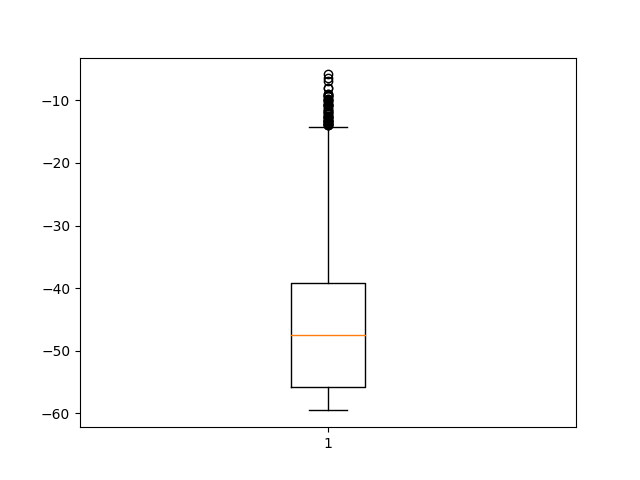

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf849ca860>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf849ca128>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf849caef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf84bc2080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf84bc2240>],
 'means': []}

In [11]:
rms_values = all_split_measure[all_split_measure['measurement']=='rms']
plt.figure()
plt.boxplot(dB(rms_values['value']))

### Choosing only those above the silence threshold
Now all windows above the silence threshold need to be chosen. Previously, in the notebook *what qualifies as a silent audio segment* I'd set the $silence+20$dB threshold. Right now, I'm wondering if that threshold is too high, and that it'd mean losing out on a lot of data. But first let's see how much data is left with +10 and +20 dB thresholds. 

In [12]:
plus20dB_threshold = pd.read_csv('../call_threshold_levels.csv')
plus20dB_threshold

Unnamed: 0  call_dbpeak_threshold  call_dbrms_threshold
0           0                  -23.0                 -37.0

In [13]:
measurement_df = all_split_measure

In [14]:
def choose_all_windows_above_threshold(measurement_df, threshold):
    '''
    Chooses all windows with rms greater or equal to the given rms threshold
    
    
    Parameters
    ----------
    measurement_df : pd.DataFrame
        A long dataframe with one measurement value per row
        Must have the columns 'measurement', 'unique_window_id'
        The 'measurement' column must also have some entries with 'rms' in them. 
    threshold : float>0
        The rms threshold to define windows which are not silent. 
    
    Returns 
    -------
    all_above_threshold : pd.DataFrame
        The dataframe with all segments across different files that are greater than or equal to the 
        chosen threshold rms. 
    '''

    rms_values = measurement_df[measurement_df['measurement']=='rms'].reset_index(drop=True)
    above_threshold = rms_values[rms_values['value']>=threshold]
    windowids_above_threshold = above_threshold['unique_window_id']
    all_above_threshold = measurement_df[measurement_df['unique_window_id'].isin(windowids_above_threshold)].reset_index(drop=True)
    return all_above_threshold


In [15]:
threshold_20db = float(10**(plus20dB_threshold['call_dbrms_threshold']/20.0))
threshold10db  = float(10**((plus20dB_threshold['call_dbrms_threshold']-10)/20.0))
threshold_20db, threshold10db

(0.01412537544622754, 0.0044668359215096305)

In [16]:
non_silent_measures = choose_all_windows_above_threshold(all_split_measure, threshold_20db)

<IPython.core.display.Javascript object>


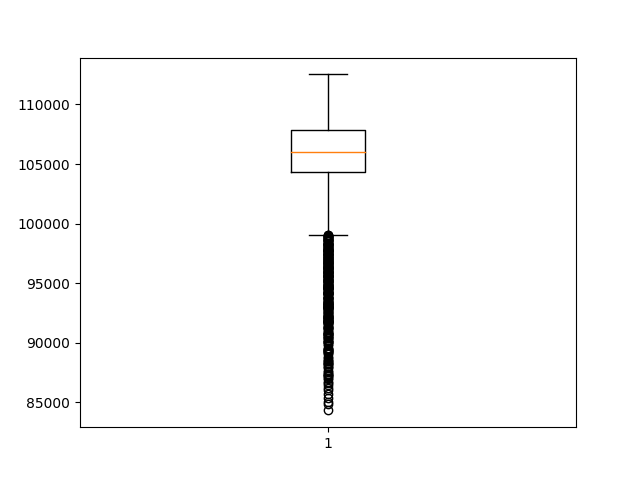

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf84c05940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf84dea400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf84c05cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf84dafeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf84ee79b0>],
 'means': []}

In [17]:
dom_freq = non_silent_measures[non_silent_measures['measurement']=='dominant_frequencies']


plt.figure()
plt.boxplot(dom_freq['value'])

<IPython.core.display.Javascript object>


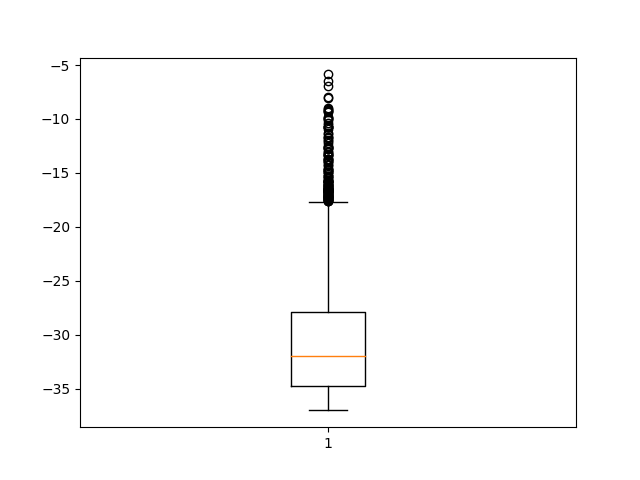

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf7f9264e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf7f926c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf7f9261d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf7f92b358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf7f92b6d8>],
 'means': []}

In [18]:
rms_df = non_silent_measures[non_silent_measures['measurement']=='rms']

plt.figure()
plt.boxplot(dB(rms_df['value']))

<IPython.core.display.Javascript object>


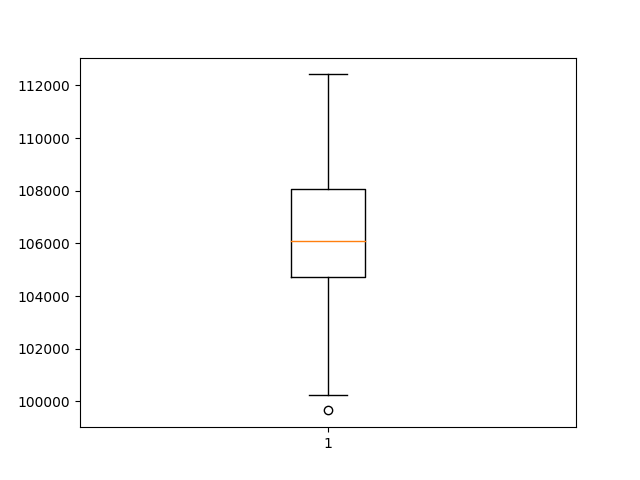

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf7f8c3710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf7f8c3e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf7f8c3400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf7f8c9588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf7f8c9908>],
 'means': []}

In [19]:
minusx_df = non_silent_measures[non_silent_measures['measurement']=='minus_XdB_frequency']

plt.figure()
plt.boxplot(minusx_df['value'])

### Assigning the number of bats to each annotation audio
Now that we have all of our measurements in place, it's time to compare each of the measurements across single and multi bat contexts.

In [20]:
non_silent_measures['video_annot_id'] = non_silent_measures['file_name'].str.lstrip('matching_annotaudio_')
# remove the '_hp' from the video_annot_ida

non_silent_measures['video_annot_id'] = non_silent_measures['video_annot_id'].str.rstrip('_hp.WAV')

In [21]:
non_silent_measures['video_annot_id'][0]

'Aditya_2018-08-16_21502300_9'

In [22]:
video_annot_folder = '../../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
non_silent_measures['num_bats'] = icf.get_numbats_from_annotation_id(non_silent_measures['video_annot_id'], video_annot_folder)

#### The numbers below represent the *rows* with the following bat numbers in the annotation audio - and not the number of annotations itself!!

In [23]:
group_size, counts = np.unique(non_silent_measures['num_bats'], return_counts=True)
print(group_size, counts)

[1 2 3] [12492  4739   636]


In [24]:
non_silent_measures.to_csv('non_silent_measurements_20dBthreshold.csv')

In [25]:
print(f'Notebook ended at: {dt.datetime.now()}')

Notebook ended at: 2020-07-13 17:03:21.757211
